# Chapter 2
## Plotting

Package you have loaded are not shared between notebooks. For each notebook you need to import the libraries again.

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

# The line below one is only needed for this workshop
from done import imdone, quizanswer

In [21]:
# Make figures bigger in presentation
from matplotlib import rcParams
rcParams['figure.dpi'] = 144

# Visualizing data with Seaborn
Visualizing data is an important part of data science. Just one single graph can make a relation clear as day. We will be using the Python package Seaborn which is built upon matplotlib but is much more user-friendly.

We will be focusing on a dataset showing the fuel economy data for 38 models of cars.

First load the data set from the supplied file `mpg.csv`.

In [3]:
mpg = pd.read_csv("data/mpg.csv")

In [4]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### Meaning of the fields
| Field | Description |
| :---: | :--- |
| manufacturer | manufacturer name |
| model | model name |
| displ | engine displacement, in litres |
| year | year of manufacture |
| cyl | number of cylinders |
| trans | type of transmission |
| drv | the type of drive train, where<br>f = front-wheel drive, r = rear wheel drive, 4 = 4wd |
| cty | city miles per gallon |
| hwy | highway miles per gallon |
| fl | fuel type |
| class | "type" of car |

### Quiz 2.1
What relationship do you expect to see between engine size (displ) and mileage (hwy)?

Put your answers in the chat!
<div style="margin-bottom: 20em;"> </div>

Let's examine this by plotting the graph using the Seaborn plotting package that we imported as `sns`. We will use the `scatterplot` function.

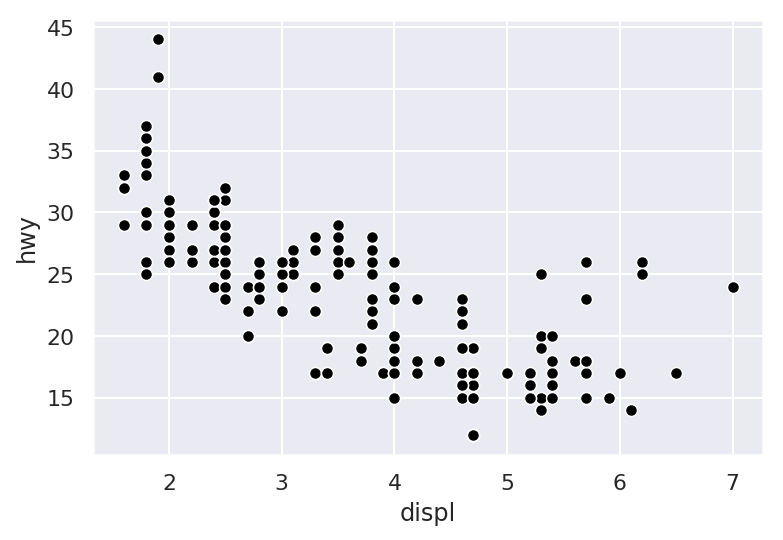

In [18]:
sns.scatterplot("displ", "hwy", color="black", data=mpg)

We see a definite downward trend for engine size (displ) versus milage (hwy). This is to be expected. Bigger cars have bigger engines and those get less milage. However, there are some points that float above the trend with big engines but reasonable good milage.

NOTE TO ME: Explain `scatterplot` function.

### Quiz 2.2
What do you think this could be? Put your answers in the chat!
<div style="margin-bottom: 20em;"> </div>

To find out, we want to highlight more of the fields we have available. Luckily, `sns.relplot` let's you specify this through in the form of colour, shape, and size. Another tool we have are facets which makes separate plots for different categories. We'll start with colour which is done through the `hue` argument.

So let's display some more data.

### Quiz 2.3
The fields we have in the data set are `manufacturer`, `model`, `displ`, `year`, `cyl`, `trans`, `drv`, `cty`, `hwy`, `fl`, `class`. See the table above for the meaning of these fields.

Which one should we try? Put your answers in the chat!
<div style="margin-bottom: 20em;"> </div>

In [ ]:
sns.scatterplot("displ", "hwy", hue="...", data=mpg)

# This line will place the legend outside the plotting area.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

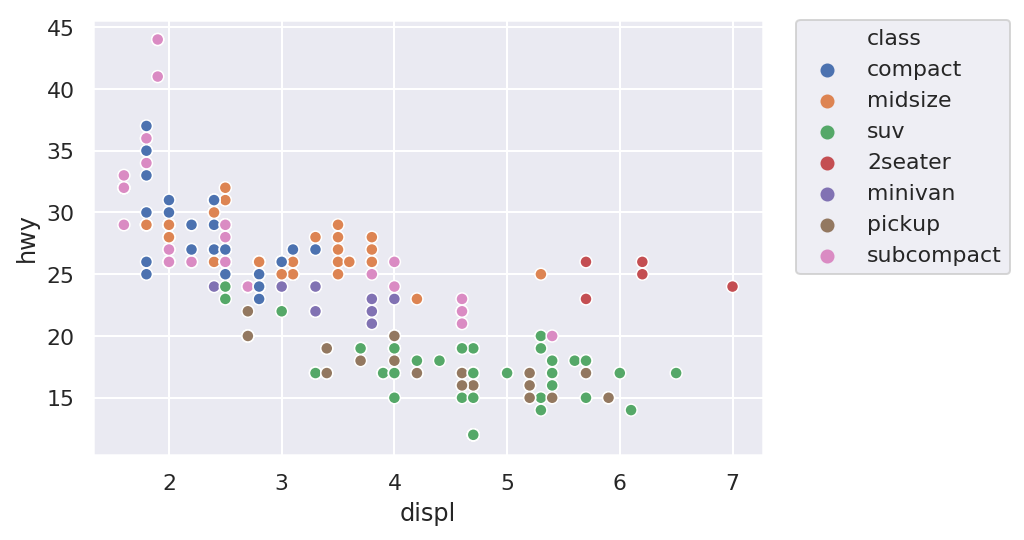

In [20]:
# SOLUTION (hide me)
sns.scatterplot("displ", "hwy", hue="class", data=mpg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can also control the size and shape of the markers to convey additional information. You can give meaning to the size by using the `size` parameter and to the shape by using the `style` parameter. They work the same as the `hue` parameter.

### Exercise 2.1
Try it out! You can even combine the parameters. Note how the legend automatically keeps track of everything for you. Warning: There is one combination that will throw an error, but that's ok.

Remember that you can make new cells with the \[+\] button in the toolbar.

When you are done, run the `imdone(2,1)` cell.

In [ ]:
sns.scatterplot("displ", "hwy", ... , data=mpg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
imdone(2,1)

## Discrete versus continuous

There is a difference between discrete variables, like `class`, and continuous variables, like `hwy`. You may have noticed that if you used `hue` with `displ` that you get a continuous range of colours.

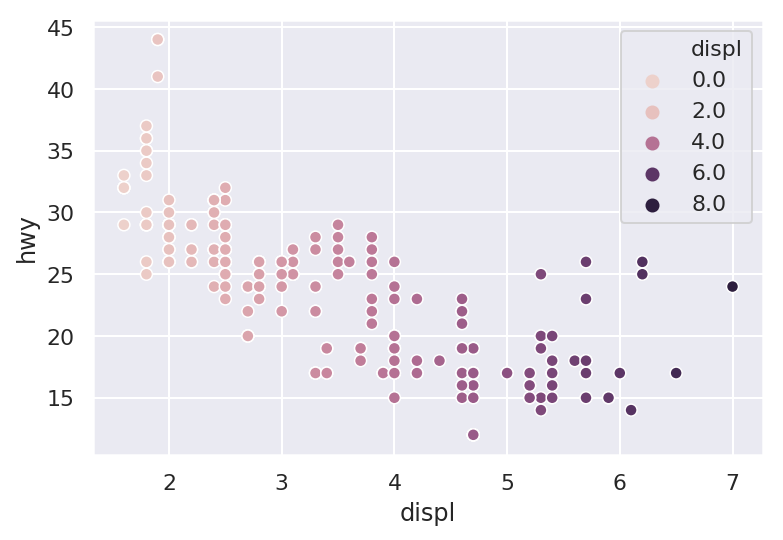

In [21]:
sns.scatterplot("displ", "hwy", hue="displ" , data=mpg)

But if you use a discrete variable, like `class`, you get primary colours.

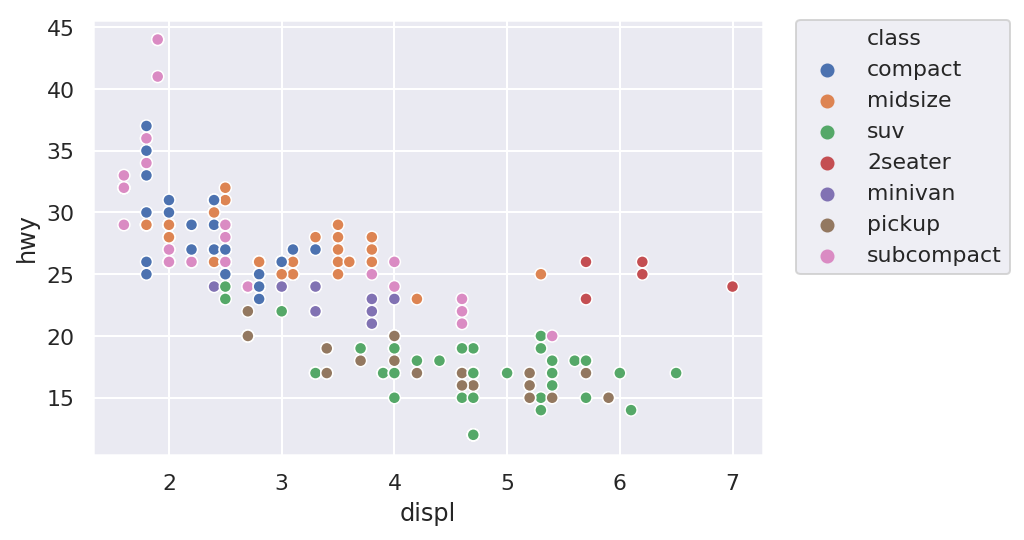

In [23]:
sns.scatterplot("displ", "hwy", hue="class" , data=mpg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The same applies to `size` although it is less obvious there. However for the shape of the markers (`style`), you get an error if you try to use a continuous variable. This makes sense, you can't have a continuous transformation from one marker to the other.

## Facets
Facets are multiple plots that can show different subsections of your data depending on field value. In essence, this is another discrete variable like `style` but instead of showing different markers, it shows different plots.

We need to use a different plotting function, `relplot`, for this.

The `col` argument lets you create these facets while `col_wrap` tells `sns.relplot` how many columns per row are allowed.

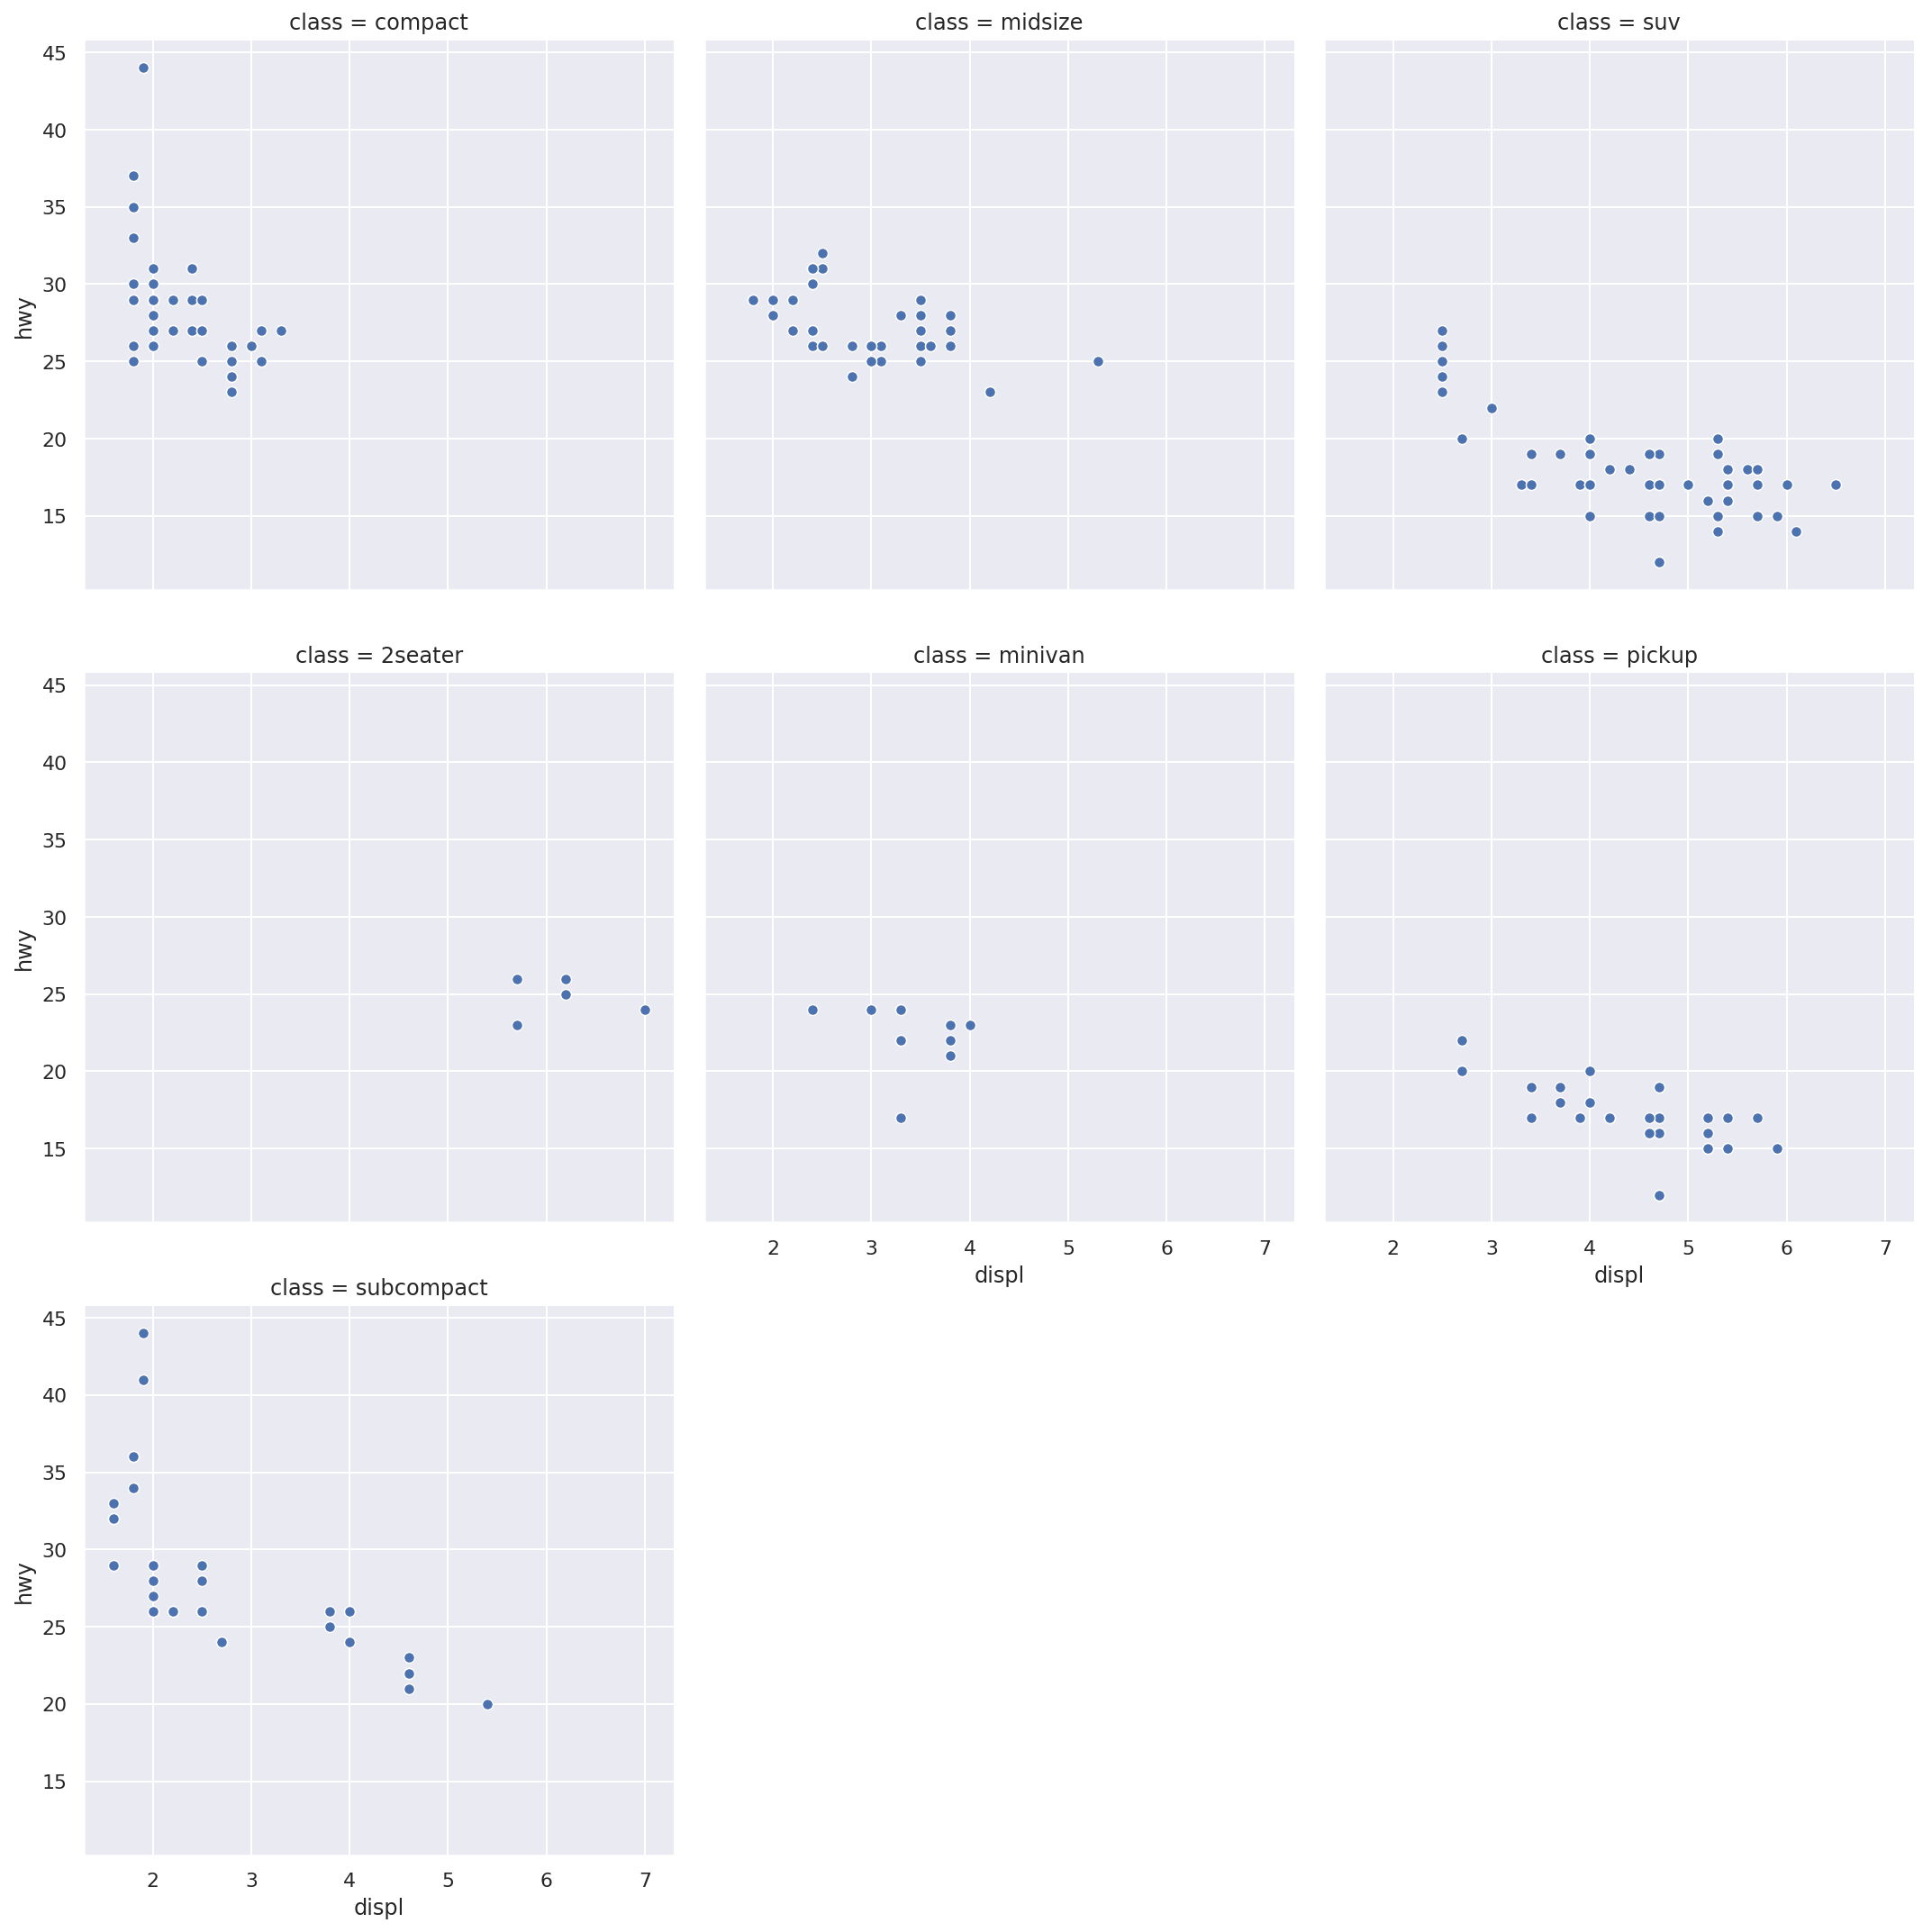

In [25]:
sns.relplot("displ", "hwy", col="class", data=mpg, col_wrap=3)

Of course you can combine this with `hue`, `size`, and `style`.

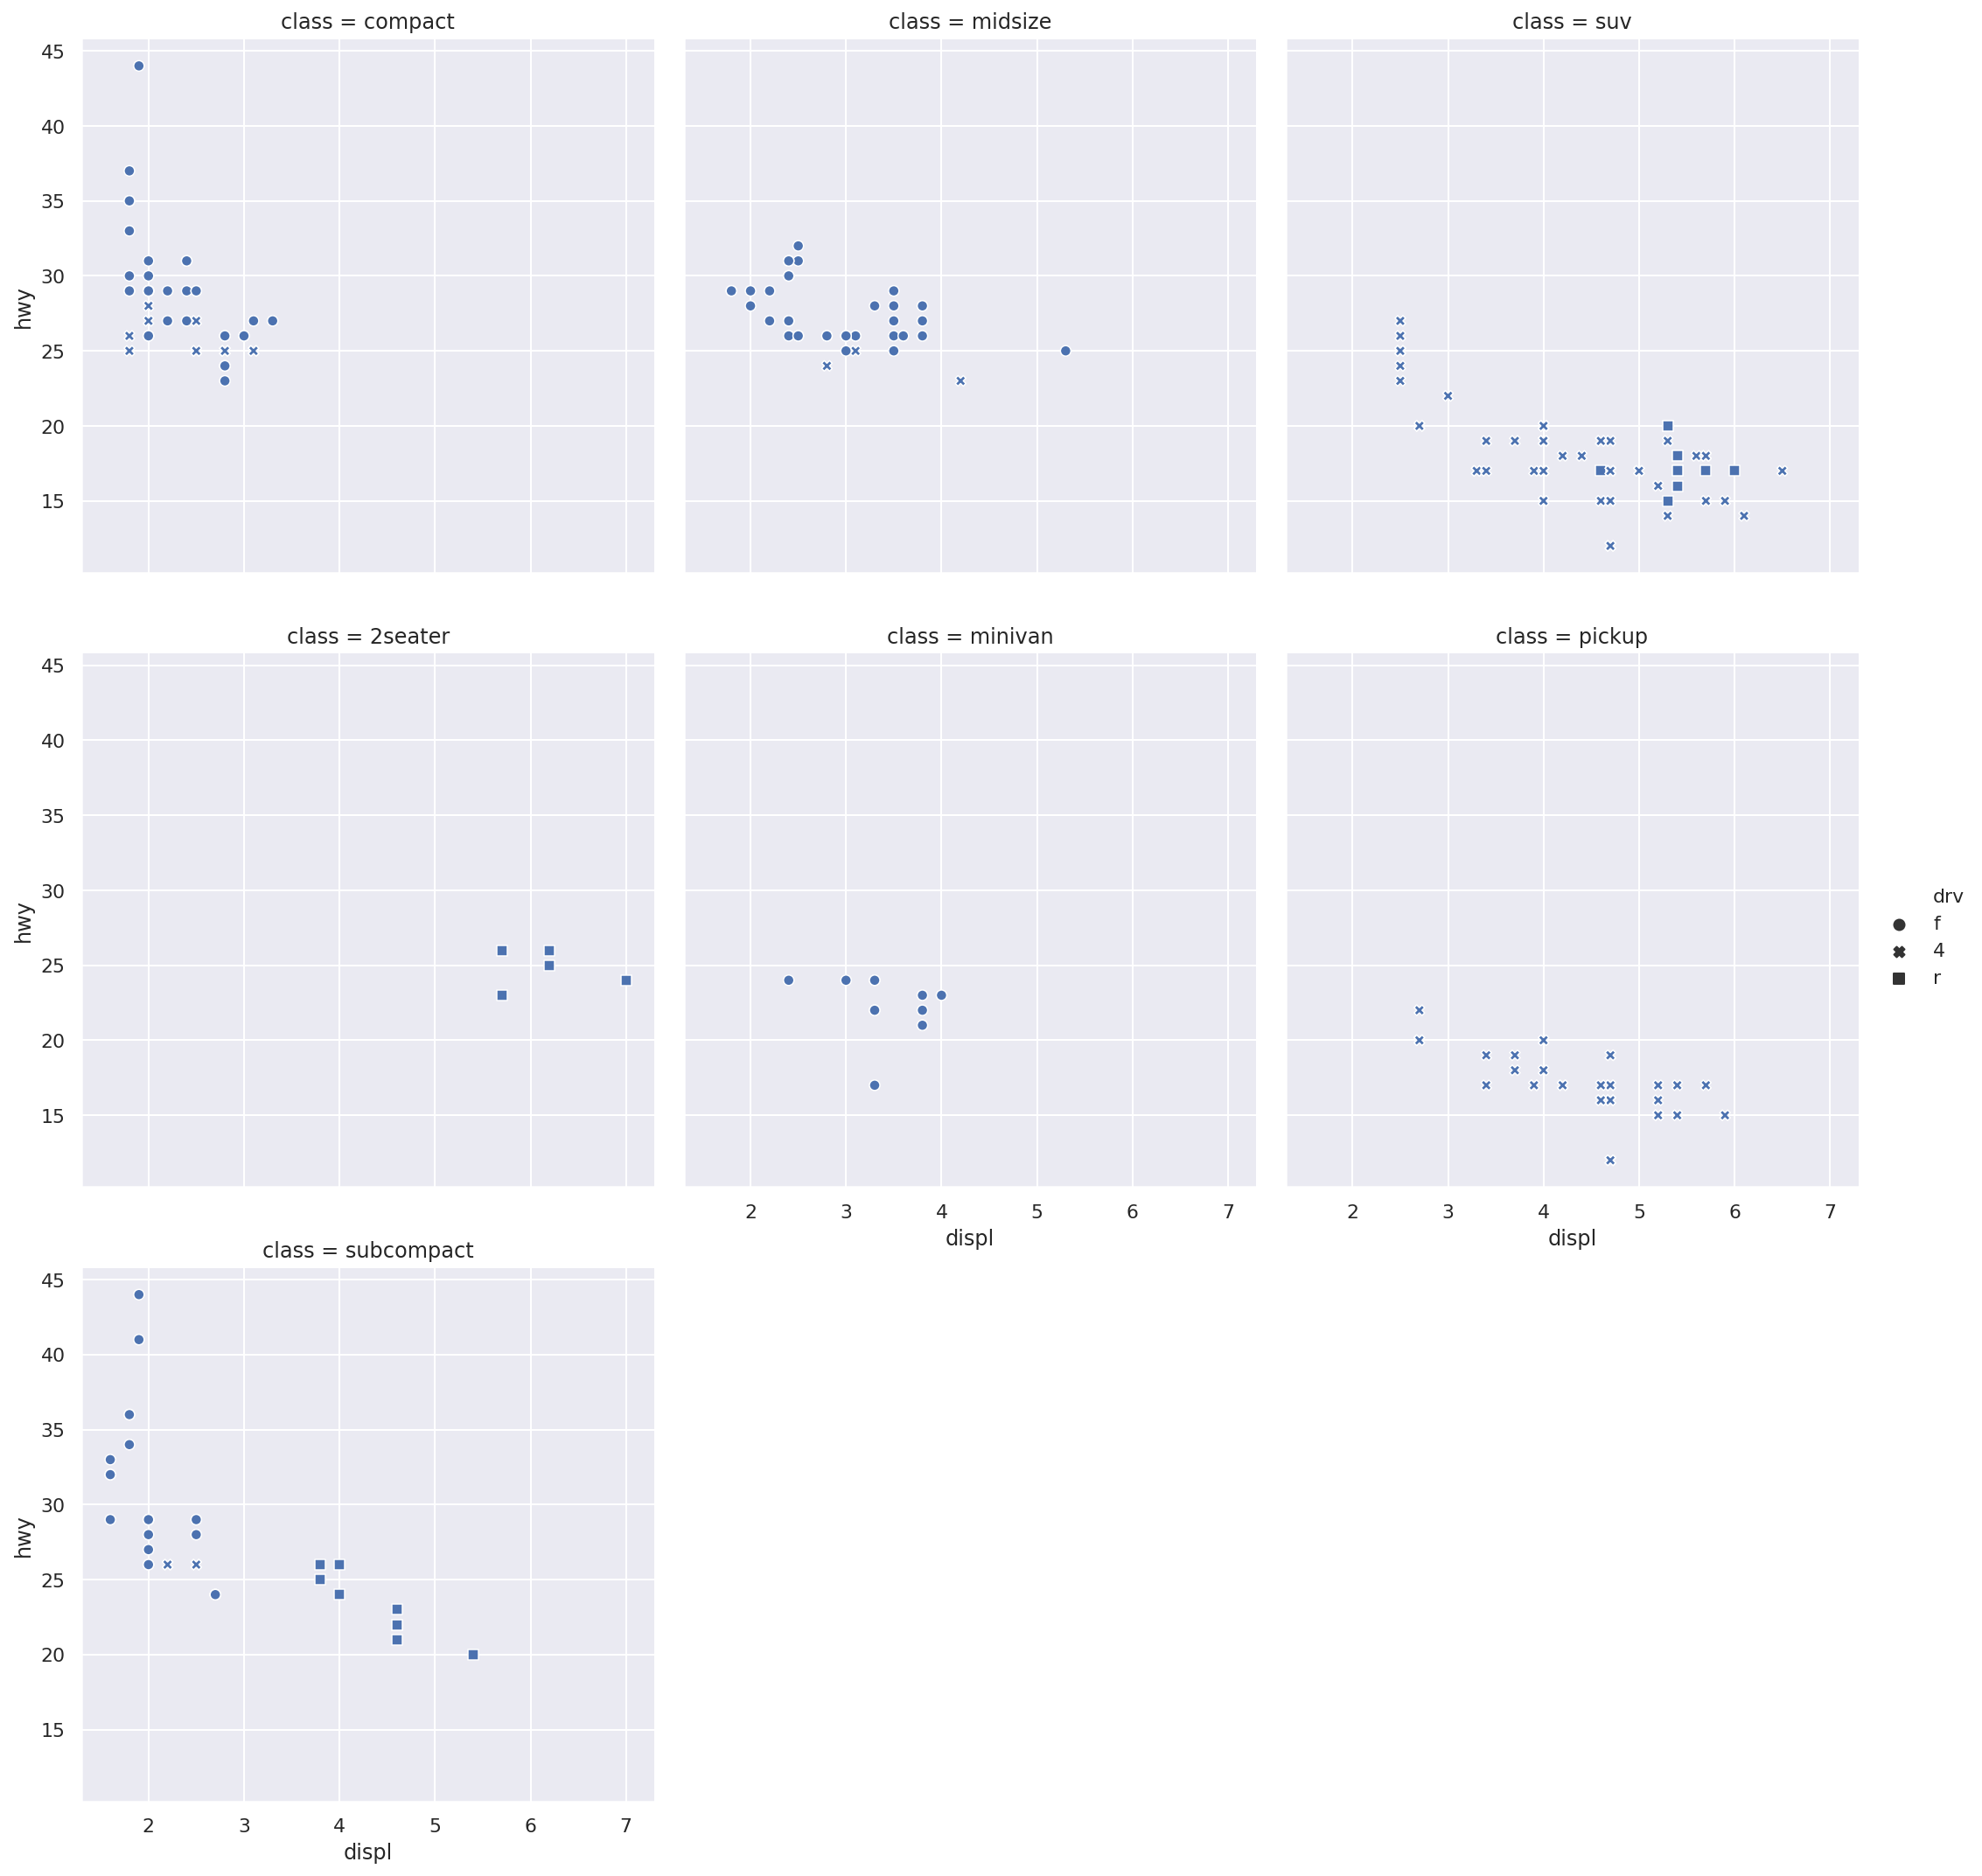

In [24]:
sns.relplot("displ", "hwy", col="class", style="drv", data=mpg, col_wrap=3)

## Formatting
All of the plotting functions automatically takes the axes names from the dataset. It's not a very great name though. Also we are missing plot titles and such.

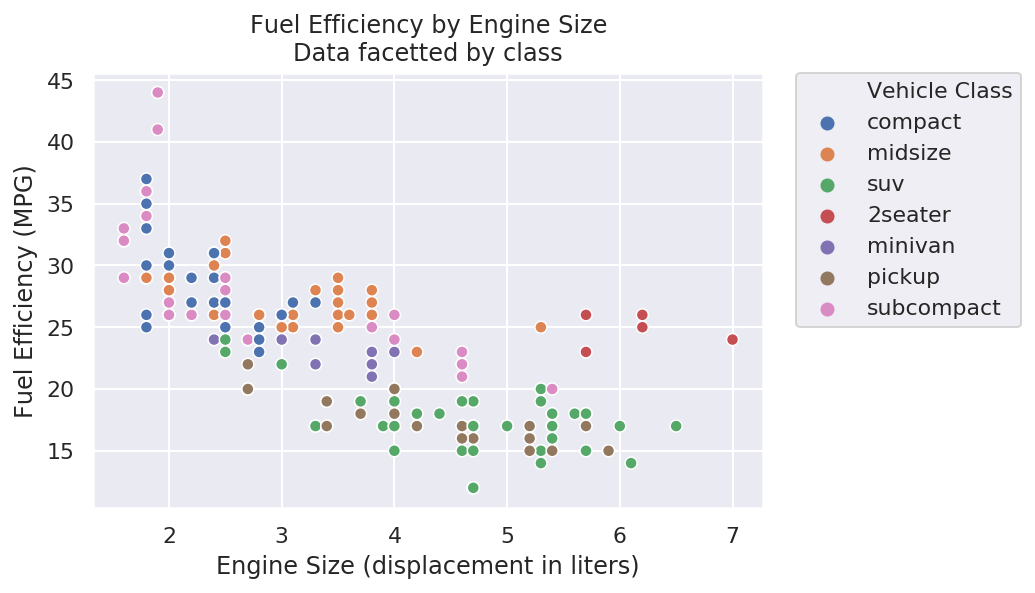

In [17]:
p = sns.scatterplot("displ", "hwy", hue="class", data=mpg)
p.set_title("Fuel Efficiency by Engine Size\nData facetted by class")
p.set_xlabel("Engine Size (displacement in liters)")
p.set_ylabel("Fuel Efficiency (MPG)")
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).texts[0].set_text("Vehicle Class")

Plot that use facet grids like `relplot` have a slightly different syntax. Note that since we don't specify `row` or `col` that we only get a 1x1 facet plot.

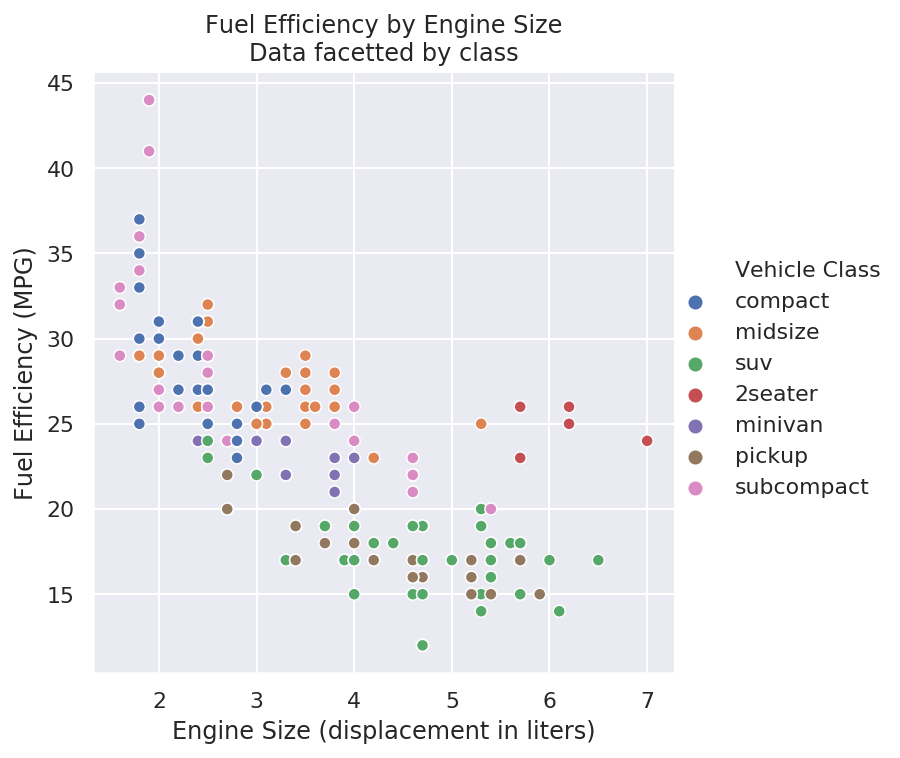

In [18]:
p = sns.relplot("displ", "hwy", hue="class", data=mpg)
p.axes[0][0].set_title("Fuel Efficiency by Engine Size\nData facetted by class")
p.set_xlabels("Engine Size (displacement in liters)")
p.set_ylabels("Fuel Efficiency (MPG)")
p._legend.texts[0].set_text('Vehicle Class')

## Other plot types
There is more than just `sns.scatterplot` and `sns.relplot`. All the plot types are listed at <https://seaborn.pydata.org/api.html>

### Exercise 2.2 (5 min)
Go to the website and have a look at the plots that are available. Click on a plot and scroll down to see the examples. Also look at the parameters that are available for each plot.

### Exercise 2.3
Recreate this figure (don't worry about overlapping words, we haven't covered that yet):
<img src="images/boxplot.png" />

In [ ]:
imdone(2,3)

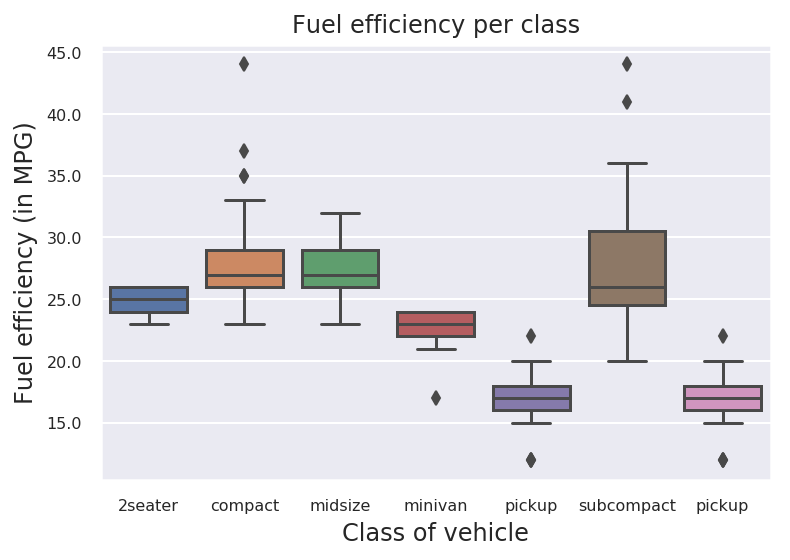

In [27]:
# Solution (HIDEME)
p = sns.boxplot(
    x="class",
    y="hwy",
    data=mpg,
    order=["2seater","compact","midsize","minivan","pickup","subcompact","pickup"],
    dodge=10
)
p.set_title("Fuel efficiency per class")
p.set_xlabel("Class of vehicle")
p.set_ylabel("Fuel efficiency (in MPG)")
p.set_xticklabels(p.get_xticklabels(), size = 8)
p.set_yticklabels(p.get_yticks(), size = 8)
pass

Changing font size is pretty tricky with Seaborn. One way of doing it is
```
p.set_xticklabels(p.get_xticklabels(), size = 8)
p.set_yticklabels(p.get_yticks(), size = 8)
```
The first line works for continuous ranges, the second for discrete.

### Exercise 2.4
Let's try to create a histogram now (HINT: Remember how to get column data)
<img src="images/histogram.png" />

In [ ]:
imdone(2,4)

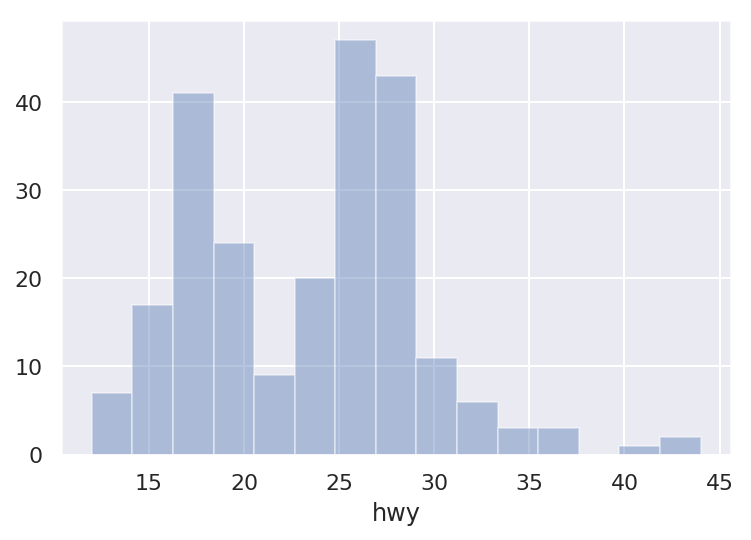

In [48]:
# Solution (HIDEME)
p=sns.distplot(mpg["hwy"], kde=False, bins=15)

## Saving plots
One way is to right-click images in the notebook and click "Save As...". However, you can also save them with the `savefig` function which will work outside of notebooks as well and is especially useful if you need to save lots of figures. It will also let you specify the format. For instance, you can save figures in SVG for infinite resolution.

In [45]:
p.get_figure().savefig("images/histogram.png")

## Combining plots
Plots can be combined by putting both plots in the same cell. However, this does not work for plot functions that output a FacetGrid plot unfortunately.

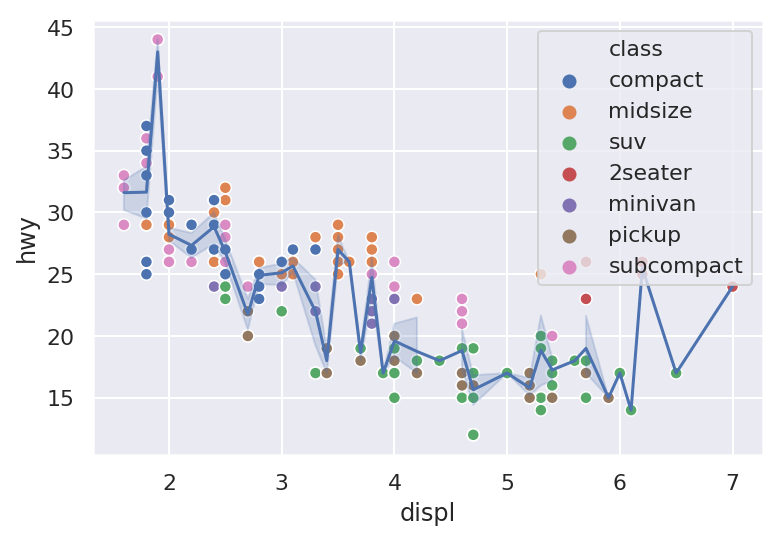

In [50]:
sns.scatterplot("displ", "hwy", hue="class", data=mpg)
sns.lineplot("displ", "hwy", data=mpg)

## Changing the colour scheme
Seaborn uses palettes to get different colour schemes. These come from matplotlib that seaborn is based on. You can also define your own. You set palettes with the function `sns.color_palette` or friends. If you put this at the top of your notebook, all plots will use this palette. You can also specify the pallete per individual plots.

The full list of palette functions is available at <https://seaborn.pydata.org/api.html#color-palettes>

You can preview them with `sns.palplot`.

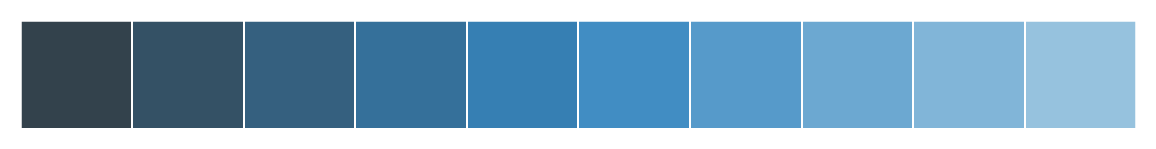

In [57]:
sns.palplot(sns.color_palette("Blues_d", 10))

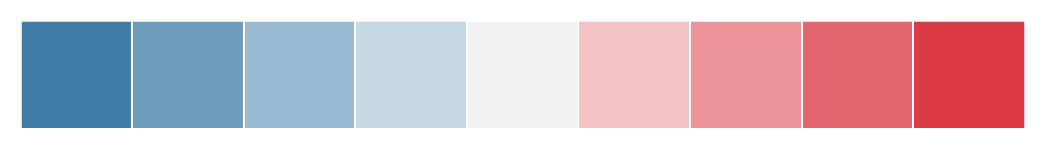

In [61]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

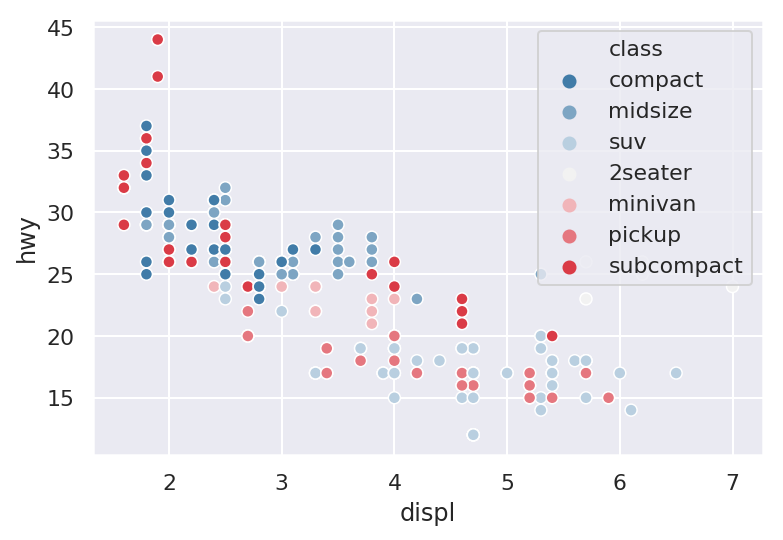

In [65]:
with sns.diverging_palette(240, 10, n=7):
    sns.scatterplot("displ", "hwy", hue="class", data=mpg)

## Where to go from here?
There are many examples of plots in the gallery
<https://seaborn.pydata.org/examples/index.html>

The code is available and often the only thing you need to change is the name of the dataset and which columns to plot.

# LUNCH TIME